### ***Describe the Data***


**players**:

This data set consists of 7 variables: experience,subscribe, hashedEmail, played hours, name, gender and age.

- Experience tells us how experienced the players are at the game from amateur to veteran to pro. (Factor Data Type)
- subscribe tells us if the players are subscribed to the newsletter with either true or false as a Logical Data type
- hashed email is a unique way to identify each player (chr data type)
- played hours tells us the amount of hours the player has played the game (numeric data type)
- name tells us the players name
- gender tells us their gender, either Male, Female, Other, or Prefer not to say (Factor data type)
- Age tells us the players age (numeric data type)

issues: Gender and Experience should be a factor data type instead of a character data type. Names are not really important information and remove anonymity.


**sessions**:

This data set contains 5 variables: hashedemail, start time, end time, original start time, and original end time.

- hashedemail is the same as from players and can be used to link the players sessions information to their players information (chr data type)
- start time is the start of the play session
- end time is the end of the play session
- original start time is the original start time
- original end time is the original end time

issues: start time and end time currently have a lot of information in one cell and need to be tidied. original end and start time are very hard to understand

  

### ***QUESTIONS***

*Broad Question*

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

*Specific Question*

Can the total playtime, experience, age, and gender of a player predict whether or not they subscribed to the newsletter in the players dataset?

To do this, I will use the playtime and subscribe from players data set. I will then use logical regression or knn regression for predictive modelling.

In [17]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(purrr)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


### ***(3) Exploratory Data Analysis and Visualization***

In [18]:
players<-read_csv("players.csv")|>
    mutate(gender=as_factor(gender))|>
    mutate(experience=as_factor(experience))|>
    select(-name)
players


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Male,17
⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Other,NA


In [19]:
sessions<-read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


#### Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.

In [20]:
mean_players<-players|>
    select(played_hours,Age)|>
    summarize(across(played_hours:Age, ~ mean(.x, na.rm = TRUE)))
mean_players
    

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


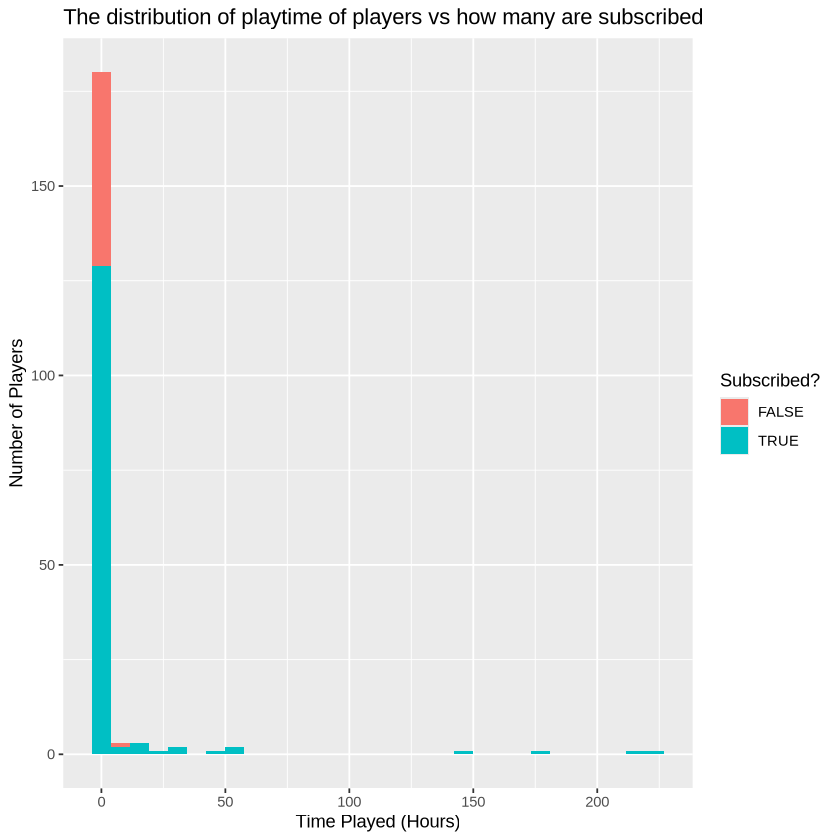

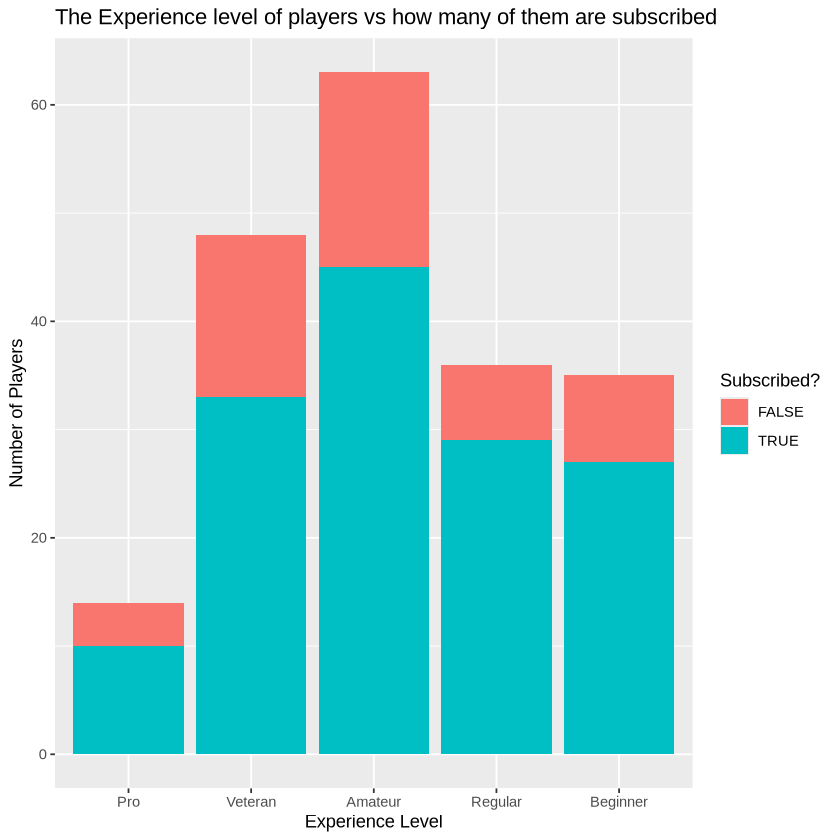

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


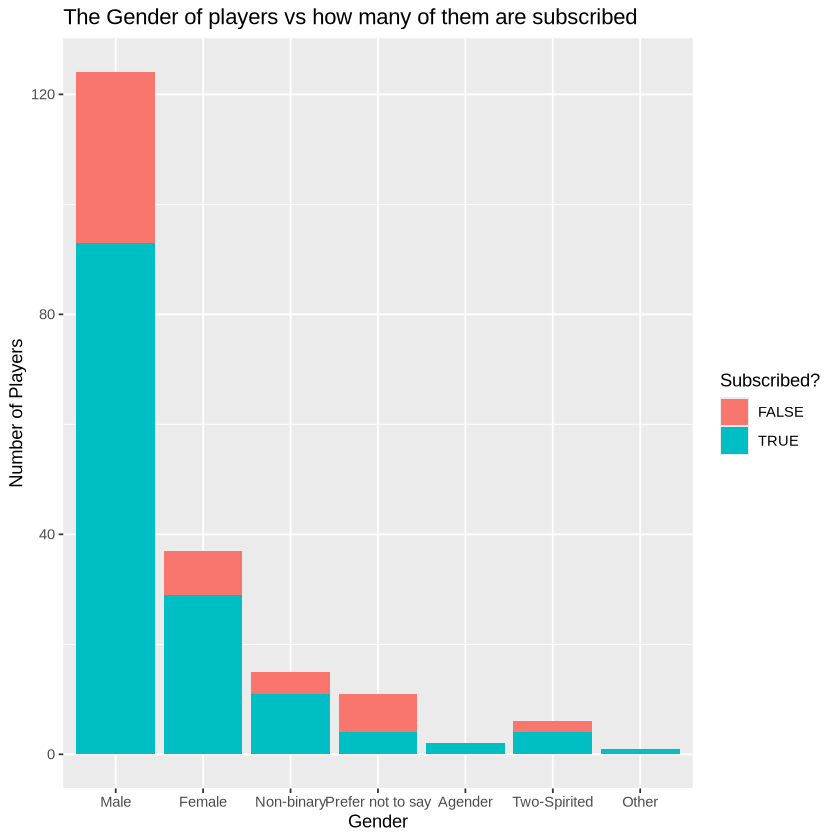

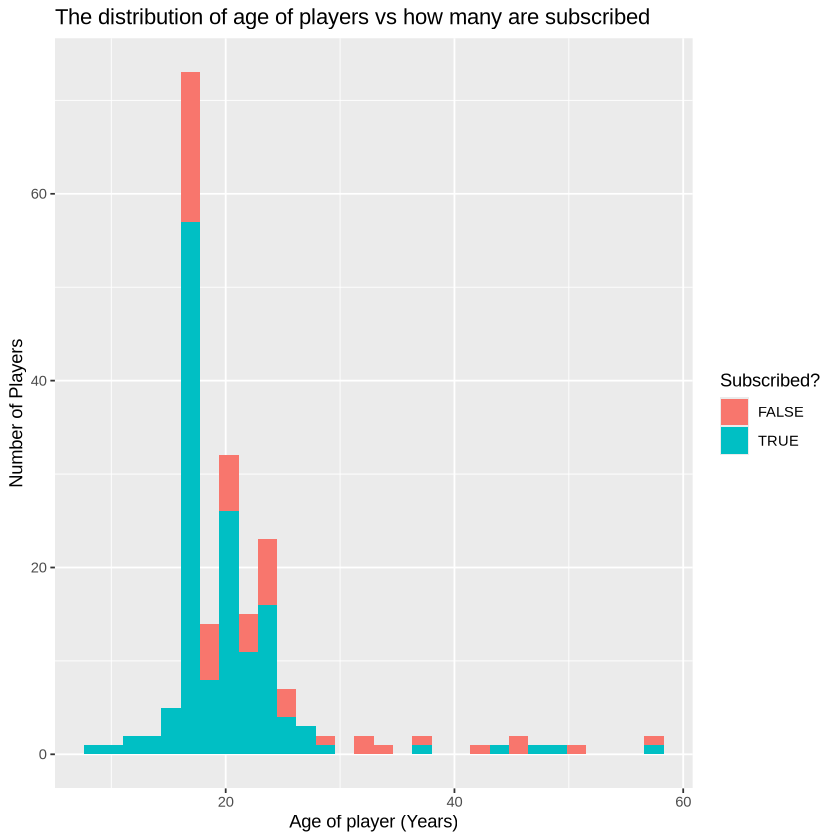

In [35]:
num_players<-nrow(players)


played_time_plot<-players|>
    ggplot(aes(x=played_hours,fill=subscribe))+
    geom_histogram()+
    labs(x="Time Played (Hours)",y="Number of Players",fill="Subscribed?")+
    ggtitle("The distribution of playtime of players vs how many are subscribed")
played_time_plot


experience_level_plot<-players|>
    ggplot(aes(x=experience,fill=subscribe))+
    geom_bar(,position="stack")+
    labs(x="Experience Level",y="Number of Players",fill="Subscribed?")+
    ggtitle("The Experience level of players vs how many of them are subscribed")
experience_level_plot

gender_plot<-players|>
    ggplot(aes(x=gender,fill=subscribe))+
    geom_bar(position="stack")+
    labs(x="Gender",y="Number of Players",fill="Subscribed?")+
    ggtitle("The Gender of players vs how many of them are subscribed")
gender_plot

age_plot<-players|>
    ggplot(aes(x=Age,fill=subscribe))+
    geom_histogram()+
    labs(x="Age of player (Years)",y="Number of Players",fill="Subscribed?")+
    ggtitle("The distribution of age of players vs how many are subscribed")
age_plot


In [ ]:
ffff